In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [5]:
species_sample_one = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Quitoense/STAR_out_Squi2_apices-2/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)
species_sample_two = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Quitoense/STAR_out_Squi2_apices-3/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)


In [6]:
species_sample_one

,Gene,Count
0,Solqui2.Cg000010,6
1,Solqui2.Cg000020,4
2,Solqui2.Cg000030,0
3,ncRNA_Solqui2.Cg003561,0
4,Solqui2.Cg000040,0
...,...,...
38886,Solqui2.ctg00000757g000020,0
38887,Solqui2.ctg00000760g000010,24
38888,Solqui2.ctg00000762g000010,0
38889,Solqui2.ctg00000762g000020,0


In [7]:
species_sample_two

,Gene,Count
0,Solqui2.Cg000010,1
1,Solqui2.Cg000020,5
2,Solqui2.Cg000030,0
3,ncRNA_Solqui2.Cg003561,0
4,Solqui2.Cg000040,0
...,...,...
38886,Solqui2.ctg00000757g000020,0
38887,Solqui2.ctg00000760g000010,1
38888,Solqui2.ctg00000762g000010,0
38889,Solqui2.ctg00000762g000020,0


In [8]:
combined_sample = pd.concat([species_sample_one['Gene'],species_sample_one['Count'],species_sample_two['Count']], axis = 1)
combined_sample

,Gene,Count,Count
0,Solqui2.Cg000010,6,1
1,Solqui2.Cg000020,4,5
2,Solqui2.Cg000030,0,0
3,ncRNA_Solqui2.Cg003561,0,0
4,Solqui2.Cg000040,0,0
...,...,...,...
38886,Solqui2.ctg00000757g000020,0,0
38887,Solqui2.ctg00000760g000010,24,1
38888,Solqui2.ctg00000762g000010,0,0
38889,Solqui2.ctg00000762g000020,0,0


In [9]:
combined_sample.columns = ['FEATURE_ID','Rep 1','Rep 2']
combined_sample = combined_sample.set_index('FEATURE_ID')

In [10]:
combined_sample.head(10)

,Rep 1,Rep 2
FEATURE_ID,,
Solqui2.Cg000010,6,1
Solqui2.Cg000020,4,5
Solqui2.Cg000030,0,0
ncRNA_Solqui2.Cg003561,0,0
Solqui2.Cg000040,0,0
Solqui2.Cg000050,2,6
Solqui2.Cg000060,6,9
Solqui2.Cg000070,10,11
Solqui2.Cg000080,0,0


In [11]:
##combined_sample.to_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Quitoense/combined_samples_for_normalizaton.tsv' , sep = '\t')


In [12]:
normalized_combined_sample = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Quitoense/fpkm_normalized_combined_samples.tsv', sep = '\t', index_col= 0)


In [13]:
normalized_combined_sample

,Rep 1,Rep 2
FEATURE_ID,,
Solqui2.Cg000010,0.154825,0.028682
Solqui2.Cg000020,0.088258,0.122627
Solqui2.Cg000030,0.000000,0.000000
ncRNA_Solqui2.Cg003561,0.000000,0.000000
Solqui2.Cg000040,0.000000,0.000000
...,...,...
Solqui2.ctg00000757g000020,0.000000,0.000000
Solqui2.ctg00000760g000010,1.124269,0.052069
Solqui2.ctg00000762g000010,0.000000,0.000000


In [14]:
scipy.stats.spearmanr(normalized_combined_sample['Rep 1'], normalized_combined_sample['Rep 2'])


SpearmanrResult(correlation=0.9636584695620827, pvalue=0.0)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

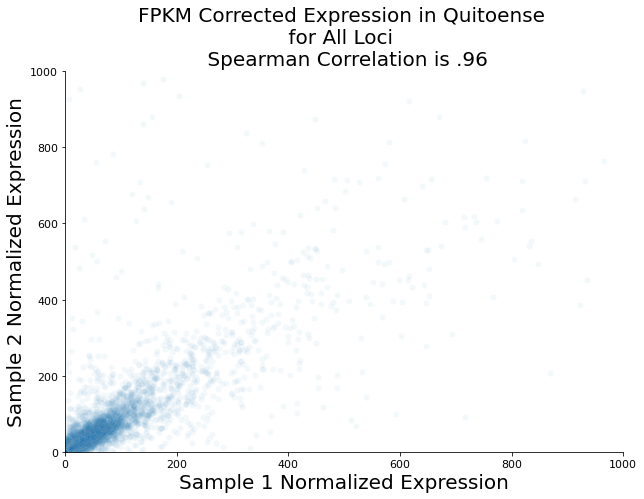

In [19]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = normalized_combined_sample, x = 'Rep 1', y = 'Rep 2', alpha = .05, edgecolors = 'none')
plt.ylabel("Sample 2 Normalized Expression", fontsize = 20)
plt.xlabel("Sample 1 Normalized Expression", fontsize = 20)
plt.xlim((0,1000))
plt.ylim((0,1000))
sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.title("FPKM Corrected Expression in Quitoense \n for All Loci  \n Spearman Correlation is .96", fontsize = 20)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)